In [18]:
import joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Input , MaxPool2D , Conv2D , Flatten
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [47]:
Xt = joblib.load('X_train')
Yt = joblib.load('Y_train')

In [48]:
model = Sequential([
    Input(shape = (64 , 64 , 3)) , 
    Conv2D(32 , 3 , activation = 'relu'),
    MaxPool2D(),
    Conv2D(16 , 3 , activation = 'relu'),
    MaxPool2D() , 
    Flatten(),
    Dense(128  , activation = 'relu'),
    Dense(16 , activation ='relu'),
    Dense(1 , activation = 'sigmoid')
])

In [49]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [50]:
import numpy as np

In [51]:
Ytt = Yt.reshape(1000 ,1)
Xt.shape

(1000, 64, 64, 3)

In [52]:
Xt

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 0.99607843],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [53]:
hist = model.fit(x = Xt , y= Yt , validation_split=0.2  , epochs = 20)

Epoch 1/20
25/25 [==============================] - 3s 97ms/step - loss: 0.6381 - accuracy: 0.7400 - val_loss: 0.5018 - val_accuracy: 0.7800
Epoch 2/20
25/25 [==============================] - 2s 63ms/step - loss: 0.4681 - accuracy: 0.7962 - val_loss: 0.3464 - val_accuracy: 0.8850
Epoch 3/20
25/25 [==============================] - 2s 63ms/step - loss: 0.3864 - accuracy: 0.8325 - val_loss: 0.3052 - val_accuracy: 0.8850
Epoch 4/20
25/25 [==============================] - 2s 62ms/step - loss: 0.3274 - accuracy: 0.8612 - val_loss: 0.2572 - val_accuracy: 0.8850
Epoch 5/20
25/25 [==============================] - 2s 63ms/step - loss: 0.2644 - accuracy: 0.8888 - val_loss: 0.2617 - val_accuracy: 0.8650
Epoch 6/20
25/25 [==============================] - 2s 63ms/step - loss: 0.2333 - accuracy: 0.8975 - val_loss: 0.1789 - val_accuracy: 0.9250
Epoch 7/20
25/25 [==============================] - 2s 60ms/step - loss: 0.2706 - accuracy: 0.8925 - val_loss: 0.2462 - val_accuracy: 0.8900
Epoch 8/20
25

In [55]:
joblib.dump(model , 'model_final')

INFO:tensorflow:Assets written to: ram://d2e266ff-c5f0-45b3-8914-5f1e598e7518/assets


['model_final']

In [56]:
hist

In [57]:
hist.history

{'loss': [0.6380622982978821,
  0.4681302309036255,
  0.38642260432243347,
  0.327363520860672,
  0.26437023282051086,
  0.23334325850009918,
  0.27059847116470337,
  0.2168087214231491,
  0.11503853648900986,
  0.039238426834344864,
  0.008317051455378532,
  0.003276495262980461,
  0.0022470338735729456,
  0.0017430600710213184,
  0.001331591745838523,
  0.0009425341850146651,
  0.0007586321444250643,
  0.0005938643007539213,
  0.00047517652274109423,
  0.00038782719639129937],
 'accuracy': [0.7400000095367432,
  0.7962499856948853,
  0.8324999809265137,
  0.8612499833106995,
  0.8887500166893005,
  0.8974999785423279,
  0.8924999833106995,
  0.9212499856948853,
  0.9649999737739563,
  0.9950000047683716,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.5018431544303894,
  0.346355140209198,
  0.30520570278167725,
  0.2571551203727722,
  0.2616783380508423,
  0.17891588807106018,
  0.246206134557724,
  0.1535760462284088,
  0.09554433077573776,
  

In [58]:
import matplotlib.pyplot as plt

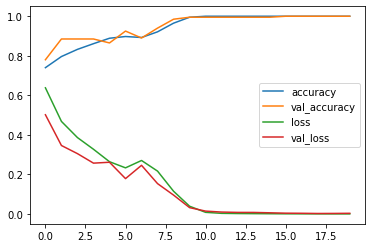

In [67]:
plt.plot(hist.history['accuracy'] , label = 'accuracy')
plt.plot(hist.history['val_accuracy'] , label = 'val_accuracy')
plt.plot(hist.history['loss'] , label = 'loss')
plt.plot(hist.history['val_loss'] , label = 'val_loss')
plt.legend()
plt.savefig('model_training_history_plot')